In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [19]:
df = pd.read_csv('predictive_maintenance.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [20]:
df.shape


(10000, 10)

In [21]:
df.drop(['Product ID', 'UDI'], axis=1, inplace=True)
df.head()


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [22]:
df['Target'].value_counts()


0    9661
1     339
Name: Target, dtype: int64

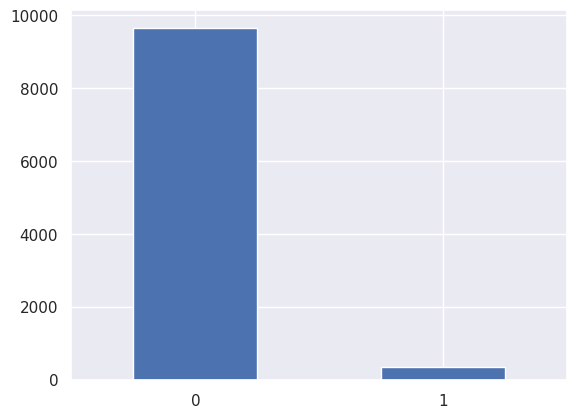

In [23]:
df['Target'].value_counts().plot.bar(rot=0)
plt.show()

In [24]:
df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [25]:
df['Failure Type'].replace(to_replace=['No Failure', 'Heat Dissipation Failure', 'Power Failure', 'Overstrain Failure', 'Tool Wear Failure', 'Random Failures'],
value=['NoF', 'HDF', 'PF', 'OF', 'TWF', 'RF'], inplace=True)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,NoF
1,L,298.2,308.7,1408,46.3,3,0,NoF
2,L,298.1,308.5,1498,49.4,5,0,NoF
3,L,298.2,308.6,1433,39.5,7,0,NoF
4,L,298.2,308.7,1408,40.0,9,0,NoF


TypeError: ignored

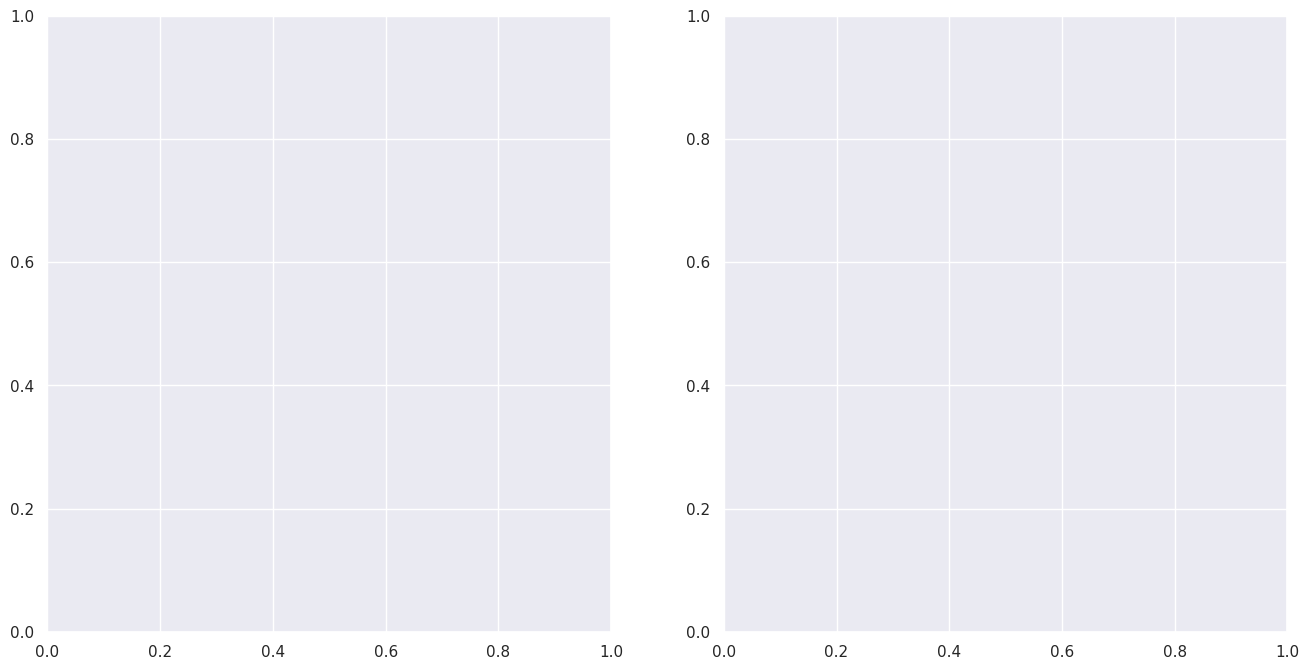

In [40]:
fig, ax = plt.subplots(1,2 , figsize=(16, 8))

sns.countplot("Type", hue="Target",data=df, ax=ax[0])
sns.countplot("Failure Type", hue="Target",data=df, ax=ax[1])

plt.show()

In [27]:
df = pd.get_dummies(df)
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_H,Type_L,Type_M,Failure Type_HDF,Failure Type_NoF,Failure Type_OF,Failure Type_PF,Failure Type_RF,Failure Type_TWF
0,298.1,308.6,1551,42.8,0,0,0,0,1,0,1,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,0,1,0,0,1,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,0,1,0,0,1,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,0,1,0,0,1,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,0,1,0,0,1,0,0,0,0


In [28]:
df.drop('Failure Type_NoF', axis=1, inplace=True)
tempt = df.pop('Target')
df = pd.concat([df, tempt], 1)
df.head()

<ipython-input-28-6df1854570d0>:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat([df, tempt], 1)


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M,Failure Type_HDF,Failure Type_OF,Failure Type_PF,Failure Type_RF,Failure Type_TWF,Target
0,298.1,308.6,1551,42.8,0,0,0,1,0,0,0,0,0,0
1,298.2,308.7,1408,46.3,3,0,1,0,0,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,1,0,0,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,1,0,0,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,1,0,0,0,0,0,0,0


In [29]:
df.shape

(10000, 14)

In [30]:
X_cols = ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]',
          'Torque [Nm]', 'Tool wear [min]','Type_H','Type_L', 'Type_M']

y_cols = ['Failure Type_OF', 'Failure Type_PF', 'Failure Type_PF', 'Failure Type_TWF', 'Target' ]

X = df[X_cols]
y = df[y_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

In [31]:
model = RandomForestClassifier(random_state=42)


# Cross Validation and Grid Search
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_features': ['auto', 'log2'],
    'max_depth' : [ 8, 11, 13, 15, 17],
    'criterion' :['gini', 'entropy']
}

CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
CV_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 11, 13, 15, 17],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [50, 100, 200, 500]})

In [32]:
param = CV_model.best_params_
param

{'criterion': 'entropy',
 'max_depth': 13,
 'max_features': 'log2',
 'n_estimators': 200}

In [33]:
mdl = RandomForestClassifier(max_depth= param['max_depth'],
                             max_features=param['max_features'],
                             n_estimators=param['n_estimators'],
                             criterion=param['criterion'],
                             random_state=42)

In [34]:
mdl.fit(X_train, y_train)
y_pred = mdl.predict(X_test)

In [35]:
print('F1 Score is :', "{:.3f}".format(f1_score(y_pred, y_test, average='micro')))

F1 Score is : 0.704


In [47]:
accuracy_score(y_test, y_pred)

0.9827272727272728